In [2]:
import pandas as pd
from utils.regression_utils import load_books_movies
df_books_movies = load_books_movies()
print(df_books_movies.columns)
print(sum(df_books_movies["title"] == "The Shawshank Redemption"))

Index(['movie_id', 'movie_cluster', 'title', 'release_date', 'runtime_x',
       'language', 'country', 'genres', 'movie_year', 'index', 'id',
       'BookTitle', 'BookYear', 'Author', 'full name', 'tmdb_id',
       'id_goodreads', 'imdbid', 'runtime_y', 'revenue', 'budget', 'rb_ratio',
       'book_id', 'normalized_rating_x', 'standardized_rating_x',
       'normalized_rating_y', 'standardized_rating_y', 'length',
       'review_count'],
      dtype='object')
0


In [3]:
from utils.regression_utils import adjust_for_inflation

books_movies_adj = adjust_for_inflation(df_books_movies, ['budget', 'revenue'], is_plotting_enabled=True)

In [4]:
from utils.regression_utils import merge_and_clean_sim
# #This function can be used to merge the dataset with the similarity scores. 
# #Since there are a lot of Nan values in the similarity column, the nan values are dropped. If we want to do it on the entire dataset, books_movies_adj can be merged directly with the book genres. 
merged_df = merge_and_clean_sim(books_movies_adj)
merged_df.drop(columns=["movie_cluster", "release_date", "language", "country", "book_summary", "film_summary"], inplace=True)
print(merged_df.head())

   movie_id                                      title  runtime_x  \
1    196176                                 Straw Dogs      118.0   
2   6703617                      The Forbidden Kingdom      105.0   
3  24416479  Beastmaster 2: Through the Portal of Time      107.0   
5  22224559                              The Last Song      107.0   
6   1231856                       For Love of the Game      137.0   

                                              genres  movie_year  index    id  \
1   {"/m/01jfsb": "Thriller", "/m/07s9rl0": "Drama"}        1971   1759  2619   
2  {"/m/08322": "Wuxia", "/m/0hj3n2k": "Fantasy A...        2008   1090  1555   
3  {"/m/0dz8b": "Sword and sorcery", "/m/06n90": ...        1991    213   289   
5  {"/m/01j1n2": "Coming of age", "/m/07s9rl0": "...        2010   1173  1693   
6  {"/m/01z02hx": "Sports", "/m/068d7h": "Romanti...        1999    749  1074   

                      BookTitle  BookYear           Author  ... review_count  \
1  The Siege of Tr

In [5]:
from utils.regression_utils import books_features_preprocessing

book_ids = merged_df[['book_id', 'movie_id', 'tmdb_id', 'adjusted_revenue', 'adjusted_budget', 'movie_year', 'runtime_y',  'film_sentiment', 'film_sentiment_score', 'book_sentiment', 'book_sentiment_score', 'similarity']]
book_genres = pd.read_csv('../data/book_genres.csv')
book_genres_df = book_genres.groupby('book_id')['genre'].apply(lambda x: ', '.join(x)).reset_index()

book_sim_genres = book_ids.merge(book_genres_df[['book_id', 'genre']], on= 'book_id', how= 'inner')
books_df_final = books_features_preprocessing(book_sim_genres=book_sim_genres)
print(books_df_final.head())

      book_id  movie_id  tmdb_id  adjusted_revenue  adjusted_budget  \
0  10051695.0    196176      994      1.870826e+07     1.265706e+07   
1    100237.0   6703617     1729      1.383948e+08     5.950994e+07   
2   7476314.0  24416479    27549      1.486988e+06     1.026305e+07   
3   6400090.0  22224559    35690      9.522854e+07     2.136677e+07   
4   1058165.0   1231856    10390      6.448907e+07     6.992558e+07   

   movie_year  runtime_y film_sentiment  film_sentiment_score book_sentiment  \
0        1971      116.0       positive              0.333608       positive   
1        2008      104.0       positive              0.995482       positive   
2        1991      107.0       positive              0.997562       positive   
3        2010      107.0       positive              0.978184       positive   
4        1999      137.0       positive              0.995503       positive   

   ...  one_star                                        cover_image  \
0  ...      20.0  htt

In [6]:
from utils.regression_utils import multi_one_hot_encode_columns

books_df_final.drop(columns=['movie_id', 'book_id', 'title', 'series', 'series_num', 'author', 'description', 'cover_image', 'five_stars', 'four_stars', 'three_stars', 'two_stars', 'one_star'], inplace=True)
print(books_df_final.columns)
books_regression = multi_one_hot_encode_columns(
    books_df_final,
    column_names_mohe=['genre'], 
    threshold=50,
    column_names_ohe=['book_sentiment', 'film_sentiment']
)
print(books_regression.columns)
book_values_df = books_regression[['three_stars_percentage', 'rating_count', 'genre_Thriller', 'part_of_series',
 'review_count' ,'genre_Adventure' ,'five_stars_percentage',
 'normalized_rating' ,'year', 'book_sentiment_positive', 'book_sentiment_score', 'similarity', 'tmdb_id', 'film_sentiment_positive', 'film_sentiment_score', 'adjusted_budget', 'adjusted_revenue', 'runtime_y', 'movie_year']].copy()
book_values_df.rename(columns={'tmdb_id':'id'}, inplace=True)


Index(['tmdb_id', 'adjusted_revenue', 'adjusted_budget', 'movie_year',
       'runtime_y', 'film_sentiment', 'film_sentiment_score', 'book_sentiment',
       'book_sentiment_score', 'similarity', 'genre', 'year', 'avg_rating',
       'rating_count', 'review_count', 'length', 'standardized_rating',
       'normalized_rating', 'part_of_series', 'one_star_percentage',
       'two_stars_percentage', 'three_stars_percentage',
       'four_stars_percentage', 'five_stars_percentage'],
      dtype='object')
Index(['tmdb_id', 'adjusted_revenue', 'adjusted_budget', 'movie_year',
       'runtime_y', 'film_sentiment_score', 'book_sentiment_score',
       'similarity', 'year', 'avg_rating', 'rating_count', 'review_count',
       'length', 'standardized_rating', 'normalized_rating', 'part_of_series',
       'one_star_percentage', 'two_stars_percentage', 'three_stars_percentage',
       'four_stars_percentage', 'five_stars_percentage',
       'book_sentiment_positive', 'film_sentiment_positive', 'gen

In [7]:
from utils.regression_utils import multi_one_hot_encode_columns
from datasets import load_dataset

# Might want to keep release data in the future???
# production companies removed as there are over 100'000 unique values

movie_regression_dataset = load_dataset("ada-datadruids/regression_dataset_tmdb")['train'].to_pandas()

movie_regression_dataset.drop(columns=['keywords', 'title', 'release_date', 'backdrop_path', 'homepage', 'original_title', 'overview', 'poster_path', 'tagline', 'production_companies', 'original_language', 'revenue', 'budget', 'imdb_id'], inplace=True)

regression_dataset_processed_df = multi_one_hot_encode_columns(
    movie_regression_dataset,
    column_names_mohe=['genres'], # keywords not taken for now
)


final_regression_df = book_values_df.merge(regression_dataset_processed_df[["vote_average", "vote_count", "popularity", "genres_Adventure", "genres_count", "id"]], on= 'id', how= 'inner')
final_regression_df.drop(columns=['id'], inplace=True)
final_regression_df.rename(columns={'rating_count':'book_rating_count', 'review_count':'book_review_count', 'genre_Adventure':'book_genre_adventure', 'genre_Thriller':'book_genre_thriller', 'normalized_rating':'book_normalized_rating', 'year':'book_year', 'runtime_y':'movie_runtime', 'vote_average':'movie_vote_average', 'vote_count':'movie_vote_count', 'popularity':'movie_popularity', 'film_sentiment_positive':'movie_sentiment_positive', 'film_sentiment_score':'movie_sentiment_score', 'genres_Adventure':'movie_genre_adventure', 'genres_count':'movie_genres_count', 'three_stars_percentage':'book_3_stars_percentage', 'part_of_series':'book_in_series', 'five_stars_percentage':'book_5_stars_percentage', 'adjusted_revenue':'movie_adjusted_revenue', 'adjusted_budget':'movie_adjusted_budget'}, inplace=True)
final_regression_df['sentiment_difference'] = final_regression_df['movie_sentiment_score'] - final_regression_df["book_sentiment_score"]

print(final_regression_df['movie_sentiment_positive'])

print(final_regression_df.columns)


0      True
1      True
2      True
3      True
4      True
       ... 
387    True
388    True
389    True
390    True
391    True
Name: movie_sentiment_positive, Length: 392, dtype: bool
Index(['book_3_stars_percentage', 'book_rating_count', 'book_genre_thriller',
       'book_in_series', 'book_review_count', 'book_genre_adventure',
       'book_5_stars_percentage', 'book_normalized_rating', 'book_year',
       'book_sentiment_positive', 'book_sentiment_score', 'similarity',
       'movie_sentiment_positive', 'movie_sentiment_score',
       'movie_adjusted_budget', 'movie_adjusted_revenue', 'movie_runtime',
       'movie_year', 'movie_vote_average', 'movie_vote_count',
       'movie_popularity', 'movie_genre_adventure', 'movie_genres_count',
       'sentiment_difference'],
      dtype='object')


In [8]:
from utils.regression_utils import create_train_test_split
split_dict = create_train_test_split(
    final_regression_df,
    target_column='movie_adjusted_revenue',
    should_split_based_on_book=False,
    test_size=0.2,
    seed=42
)
X_train, X_test, y_train, y_test = split_dict['all']

In [9]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import numpy as np

model = sm.OLS(y_train, X_train)
results = model.fit()

y_pred = results.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred))
print("RMSE value:", rmse)


results_summary = results.summary()
results.summary()

RMSE value: 734464420.2763523


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     17.26
Date:                Fri, 20 Dec 2024   Prob (F-statistic):           1.17e-40
Time:                        13:49:02   Log-Likelihood:                -6426.0
No. Observations:                 313   AIC:                         1.290e+04
Df Residuals:                     290   BIC:                         1.298e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     2.073e+08   1.17e+07     17.694      0.000    1.84e+08     2.3e+08
book_3_stars_percentage    5.71e+07   4.54e+07      1.258      0.209   -3.22e+07    1.46e+08
book_rating_count         6.288e+06   3.82e+07      0.165      0.869   -6.89e+07    8.15e+07
book_genre_thriller       3.526e+07   1.35e+07      2.613      0.009     8.7e+06    6.18e+07
book_in_series            4.441e+07    1.3e+07      3.416      0.001    1.88e+07       7e+07
book_review_count        -1.787e+07   3.57e+07     -0.500      0.617   -8.82e+07    5.24e+07
book_genre_adventure      3.502e+07   1.57e+07      2.235      0.026    4.19e+06    6.59e+07
book_5_stars_percentage   3.562e+07   5.02e+07      0.710      0.478   -6.31e+07    1.34e+08
book_normalized_rating     1.02e+06   3.91e+07      0.026      0.979    -7.6e+07     7.8e+07
book_year                 4.647e+06   1.27e+07      0.366      0.715   -2.04e+07    2.96e+07
book_sentiment_positive   6.399e+06    2.3e+07      0.279      0.781   -3.88e+07    5.16e+07
book_sentiment_score      1.335e+06   1.73e+07      0.077      0.939   -3.28e+07    3.54e+07
similarity                2.331e+07   1.28e+07      1.818      0.070   -1.92e+06    4.85e+07
movie_sentiment_positive  3.988e+06   2.11e+07      0.189      0.850   -3.75e+07    4.55e+07
movie_sentiment_score    -3.987e+06   1.52e+07     -0.263      0.793   -3.38e+07    2.58e+07
movie_adjusted_budget     6.698e+07   1.53e+07      4.379      0.000    3.69e+07    9.71e+07
movie_runtime             2.001e+07   1.28e+07      1.560      0.120   -5.24e+06    4.53e+07
movie_year               -4.602e+07   1.42e+07     -3.252      0.001   -7.39e+07   -1.82e+07
movie_vote_average        1.393e+07   1.75e+07      0.796      0.427   -2.05e+07    4.84e+07
movie_vote_count          8.352e+07   2.29e+07      3.653      0.000    3.85e+07    1.29e+08
movie_popularity          6.943e+07   2.11e+07      3.287      0.001    2.79e+07    1.11e+08
movie_genre_adventure     2.634e+07   1.69e+07      1.558      0.120   -6.94e+06    5.96e+07
movie_genres_count       -3.382e+07   1.36e+07     -2.492      0.013   -6.05e+07   -7.11e+06
sentiment_difference     -4.469e+06   1.16e+07     -0.386      0.700   -2.73e+07    1.83e+07
==============================================================================
Omnibus:                      245.632   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6272.918
Skew:                           2.931   Prob(JB):                         0.00
Kurtosis:                      24.134   Cond. No.                     9.10e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified

In [10]:
color_palette = {
    **{feature: (
        '#CC6677' if feature == 'book_genre_thriller' else
        '#332288' if feature == 'similarity' else
        '#DDCC77' if feature == 'movie_runtime' else
        '#117733' if feature == 'movie_genre_adventure' else
        '#882255' if feature == 'book_in_series' else
        '#44AA99' if feature == 'movie_year' else
        '#999933' if feature == 'book_genre_adventure' else
        '#AA4499' if feature == 'movie_adjusted_budget' else
        '#BBCCEE' if feature == 'movie_popularity' else
        '#88CCEE' if feature == 'movie_vote_count' else
        '#CCDDAA' if feature == 'book_in_series' else
        '#EEEEBB' if feature ==  'movie_genres_count' else
        'grey'  # Default grey for everything else
    ) for feature in [
        'book_3_stars_percentage', 'book_rating_count', 'book_genre_thriller',
        'book_in_series', 'book_review_count', 'book_genre_adventure',
        'book_5_stars_percentage', 'book_normalized_rating', 'book_year',
        'book_sentiment_positive', 'book_sentiment_score', 'similarity',
        'movie_sentiment_positive', 'movie_sentiment_score',
        'movie_adjusted_budget', 'movie_adjusted_revenue', 'movie_runtime',
        'movie_year', 'movie_vote_average', 'movie_vote_count',
        'movie_popularity', 'movie_genre_adventure',
        'sentiment_difference', 'book_5_stars_percentage']}
}


In [33]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt

to_include = results.params[results.pvalues < 0.10][1:].sort_values() # get only those with significant pvalues
confidence_intervals = results.conf_int().loc[to_include.index]
ci_values = confidence_intervals.values
colors = [color_palette.get(feature, "#eb5600") for feature in to_include.index]  

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=to_include.values / 1e6,  # Scale x-axis values to 1e6
    y=to_include.index,
    mode='markers',
    marker=dict(size=10, color=colors),
    name="Proportional Effect",
    hoverinfo="text",
    text=[
        f"Feature: {feature}<br>Proportional Effect: {effect / 1e6:.2f} Millions<br>CI: ({ci[0] / 1e6:.2f} Millions, {ci[1] / 1e6:.2f} Millions)"
        for feature, effect, ci in zip(to_include.index, to_include.values.astype(float), ci_values.astype(float))
    ]
))


for i, (ci, color) in enumerate(zip(ci_values, colors)):
    fig.add_shape(
        type="line",
        x0=ci[0] / 1e6,  # Lower CI bound
        x1=ci[1] / 1e6,  # Upper CI bound
        y0=i,  
        y1=i,  
        line=dict(color=color, width=4, dash='solid')  
    )

fig.add_vline(
    x=0,
    line=dict(color="red", width=1, dash='dash'),
)
fig.update_layout(
    title=dict(
        text="Linear Regression of <br> Book and Movie Features",  # Bold the title
        x=0.02, y=0.95  
    ),
    xaxis=dict(
        title="Proportional Effect (in Millions)",
        tickvals=[-40, -20, 0, 20, 40, 60, 80],
    ),

    yaxis=dict(
        title="",
        tickmode="array",
        tickvals=list(range(len(to_include.index))),
        ticktext=list(to_include.index)
    ),
    template="plotly_white",
    width=None,
    height=None,     
    margin=dict(t=40, l=20, r=20),
)

fig.show()


In [35]:
html_content = f"""
        <!DOCTYPE html>
        <html>
        <head>
            <style>
                .plotly-graph-div {{
                    width: 100% !important;
                    height: 100% !important;
                }}
            </style>
        </head>
        <body>
            <div id="plotly-div"></div>
            <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>
            <script>
                var plotly_data = {fig.to_json()};
                Plotly.newPlot('plotly-div', plotly_data.data, plotly_data.layout);
            </script>
        </body>
        </html>
        """
with open('reg_books_movies.html', 'w') as f:
    f.write(html_content)

In [13]:
results_as_html = results_summary.tables[1].as_html()
results_df = pd.read_html(results_as_html, header=0, index_col=0)[0]
results_df["coef"] = results_df["coef"].abs()
results_df.sort_values("coef")

/var/folders/_t/wz53gqgx2jl97snjc7ndwdd80000gn/T/ipykernel_11316/1282834958.py:2: FutureWarning:

Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.



,coef,std err,t,P>|t|,[0.025,0.975]
book_normalized_rating,1020000.0,39100000.0,0.026,0.979,-76000000.0,78000000.0
book_sentiment_score,1335000.0,17300000.0,0.077,0.939,-32800000.0,35400000.0
movie_sentiment_score,3987000.0,15200000.0,-0.263,0.793,-33800000.0,25800000.0
movie_sentiment_positive,3988000.0,21100000.0,0.189,0.850,-37500000.0,45500000.0
sentiment_difference,4469000.0,11600000.0,-0.386,0.700,-27300000.0,18300000.0
book_year,4647000.0,12700000.0,0.366,0.715,-20400000.0,29600000.0
book_rating_count,6288000.0,38200000.0,0.165,0.869,-68900000.0,81500000.0
book_sentiment_positive,6399000.0,23000000.0,0.279,0.781,-38800000.0,51600000.0
movie_vote_average,13930000.0,17500000.0,0.796,0.427,-20500000.0,48400000.0
book_review_count,17870000.0,35700000.0,-0.500,0.617,-88200000.0,52400000.0


# Random Forest

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold

In [15]:
# param_grid = {

#     'n_estimators': [2, 5, 10, 25, 100, 150],

#     'max_depth': [10, 15, 20],

#     'min_samples_split': [2, 5, 10],

#     'min_samples_leaf': [2, 4, 6, 8],
 
#     'bootstrap': [False, True]

# }

# model = RandomForestRegressor(random_state=42)
# cv = KFold(n_splits=5, shuffle=True, random_state=42)

# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train.ravel())
# best_params = grid_search.best_params_
# # best_params = {'bootstrap': True, 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
# print('Best parameters:', best_params)

In [16]:
best_params = {'bootstrap': True, 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
best_model = RandomForestRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train.ravel())

predictions = best_model.predict(X_test)

rmse = mean_squared_error(y_test, predictions)
print('Validation error (RMSE):', rmse)
r2 = r2_score(y_test, predictions)
print('R^2 Score:', r2)

Validation error (RMSE): 5.547278580560966e+17
R^2 Score: 0.129163189703297


In [64]:
import matplotlib.pyplot as plt
import plotly.express as px
importances = best_model.feature_importances_

feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Create interactive bar chart
fig = px.bar(
    feature_importances.head(10),
    y='Feature',
    x='Importance',
    color='Feature',
    color_discrete_map=color_palette,
)

fig.update_layout(
    title=dict(
        text="Random Forest Importances of <br> Book and Movie Features",  
        x=0.02,
        y = 0.95 
    ),
    yaxis=dict(
        title="",
        tickmode="array",
    ),
    template="plotly_white",
    width=None,
    height=None,     
    showlegend=False,
    margin=dict(t=60, l=20, r=10),

)

# Add tooltips for better interactivity
fig.update_traces(
    hovertemplate='<b>%{y}</b><br>Importance: %{x:.3f}<extra></extra>'
    
)

fig.show()

In [29]:
html_content = f"""
        <!DOCTYPE html>
        <html>
        <head>
            <style>
                .plotly-graph-div {{
                    width: 100% !important;
                    height: 100% !important;
                }}
            </style>
        </head>
        <body>
            <div id="plotly-div"></div>
            <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>
            <script>
                var plotly_data = {fig.to_json()};
                Plotly.newPlot('plotly-div', plotly_data.data, plotly_data.layout);
            </script>
        </body>
        </html>
        """
with open('forest_books_movies.html', 'w') as f:
    f.write(html_content)


In [19]:
coefficients = results.params
p_values = results.pvalues
coeff_df = pd.DataFrame({
    'Coefficient': coefficients,
    'P-Value': p_values
})
coeff_df['Feature'] = coeff_df.index
# Display the DataFrame
display(coeff_df)

,Coefficient,P-Value,Feature
const,2.072775e+08,5.067761e-48,const
book_3_stars_percentage,5.710351e+07,2.092652e-01,book_3_stars_percentage
book_rating_count,6.287530e+06,8.693690e-01,book_rating_count
book_genre_thriller,3.525715e+07,9.439158e-03,book_genre_thriller
book_in_series,4.440529e+07,7.250475e-04,book_in_series
book_review_count,-1.787224e+07,6.172981e-01,book_review_count
book_genre_adventure,3.502139e+07,2.615115e-02,book_genre_adventure
book_5_stars_percentage,3.562310e+07,4.780896e-01,book_5_stars_percentage
book_normalized_rating,1.019878e+06,9.792264e-01,book_normalized_rating
book_year,4.646735e+06,7.147461e-01,book_year


In [20]:
combined_features = feature_importances.merge(coeff_df, on = 'Feature', how='inner')

display(combined_features)

,Feature,Importance,Coefficient,P-Value
0,movie_vote_count,0.347658,8.352477e+07,3.079894e-04
1,movie_popularity,0.216703,6.942735e+07,1.136062e-03
2,movie_adjusted_budget,0.104173,6.698392e+07,1.666164e-05
3,movie_year,0.076855,-4.602019e+07,1.283356e-03
4,movie_genre_adventure,0.054310,2.634127e+07,1.203520e-01
5,similarity,0.028131,2.330773e+07,7.002451e-02
6,book_3_stars_percentage,0.026571,5.710351e+07,2.092652e-01
7,book_genre_adventure,0.025350,3.502139e+07,2.615115e-02
8,book_5_stars_percentage,0.020039,3.562310e+07,4.780896e-01
9,movie_vote_average,0.018281,1.393450e+07,4.267460e-01


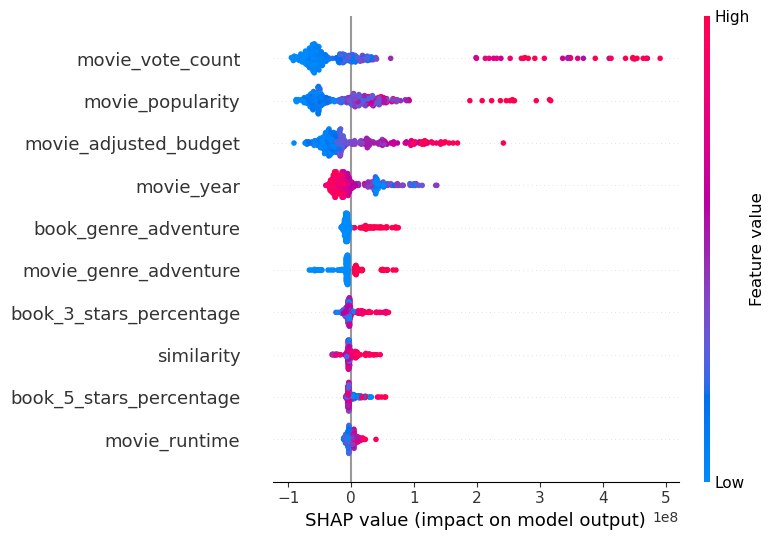

In [21]:
import shap

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train, max_display=10, show = False)

#plt.savefig('books_movies_shap.svg', format='svg', dpi = 1200)